In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [5]:
data = pd.read_table('H:\epfaff_working\OHack\DxMedCoOcc.txt',sep='|',encoding = 'ISO-8859-1')
data.head()

,UNCH_SIMPLE_GENERIC_NAME,ICD10DESC,DRUGDENOM,DXDENOM,COMBOCOUNT,TOTALDENOM
0,HYDROMORPHONE HCL,INAPPROPRIATE SINUS TACHYCARDIA,98688,145,11,985730
1,FENTANYL CITRATE/PF,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),166369,1163,134,985730
2,OXYCODONE HCL,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),122765,1163,102,985730
3,MORPHINE SULFATE,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),123167,1163,214,985730
4,OXYCODONE HCL/ACETAMINOPHEN,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),134688,1163,134,985730


In [6]:
data['B'] = data['DRUGDENOM'] - data['COMBOCOUNT']
data['C'] = data['DXDENOM'] - data['COMBOCOUNT']
data['A'] = data['TOTALDENOM'] - data['COMBOCOUNT'] - data['B'] - data['C']
data.head()

,UNCH_SIMPLE_GENERIC_NAME,ICD10DESC,DRUGDENOM,DXDENOM,COMBOCOUNT,TOTALDENOM,B,C,A
0,HYDROMORPHONE HCL,INAPPROPRIATE SINUS TACHYCARDIA,98688,145,11,985730,98677,134,886908
1,FENTANYL CITRATE/PF,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),166369,1163,134,985730,166235,1029,818332
2,OXYCODONE HCL,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),122765,1163,102,985730,122663,1061,861904
3,MORPHINE SULFATE,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),123167,1163,214,985730,122953,949,861614
4,OXYCODONE HCL/ACETAMINOPHEN,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),134688,1163,134,985730,134554,1029,850013


In [8]:
#Testing the first row's significant. News flash: Not significant.
obs = np.array([ [886908, 98677], [134, 11]])
chi2,p,dof,exp = stats.chi2_contingency( obs )
print('Chi-square:{}   p:{}'.format(chi2, p))

Chi-square:0.696834837943366   p:0.40384928274369447


In [13]:
data['p'] = data.apply(lambda row: stats.chi2_contingency( np.array( [[row['A'],row['B']],[row['C'],row['COMBOCOUNT']]]) )[1], axis=1)

In [14]:
data['chi2'] = data.apply(lambda row: stats.chi2_contingency( np.array( [[row['A'],row['B']],[row['C'],row['COMBOCOUNT']]]) )[0], axis=1)

In [15]:
data.head()

,UNCH_SIMPLE_GENERIC_NAME,ICD10DESC,DRUGDENOM,DXDENOM,COMBOCOUNT,TOTALDENOM,B,C,A,p,chi2
0,HYDROMORPHONE HCL,INAPPROPRIATE SINUS TACHYCARDIA,98688,145,11,985730,98677,134,886908,4.038493e-01,0.696835
1,FENTANYL CITRATE/PF,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),166369,1163,134,985730,166235,1029,818332,1.297616e-06,23.426750
2,OXYCODONE HCL,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),122765,1163,102,985730,122663,1061,861904,1.682723e-04,14.155858
3,MORPHINE SULFATE,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),123167,1163,214,985730,122953,949,861614,1.448047e-09,36.603054
4,OXYCODONE HCL/ACETAMINOPHEN,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),134688,1163,134,985730,134554,1029,850013,3.705081e-02,4.348075


In [16]:
data.to_csv('ICD_Combo_Chi2.txt',sep='\t')

In [17]:
import matplotlib.pyplot as plt

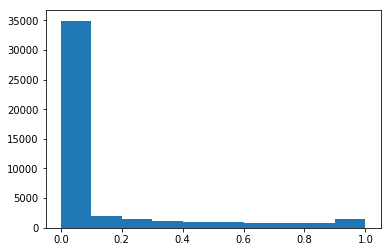

In [18]:
plt.hist( data['p'])
plt.show()

In [19]:
len(data)

45169

In [20]:
data['expected'] = data.apply(lambda row: stats.chi2_contingency( np.array( [[row['A'],row['B']],[row['C'],row['COMBOCOUNT']]]) )[3][1][1], axis=1)

In [21]:
data.head()

,UNCH_SIMPLE_GENERIC_NAME,ICD10DESC,DRUGDENOM,DXDENOM,COMBOCOUNT,TOTALDENOM,B,C,A,p,chi2,expected
0,HYDROMORPHONE HCL,INAPPROPRIATE SINUS TACHYCARDIA,98688,145,11,985730,98677,134,886908,4.038493e-01,0.696835,14.516916
1,FENTANYL CITRATE/PF,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),166369,1163,134,985730,166235,1029,818332,1.297616e-06,23.426750,196.288179
2,OXYCODONE HCL,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),122765,1163,102,985730,122663,1061,861904,1.682723e-04,14.155858,144.842599
3,MORPHINE SULFATE,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),123167,1163,214,985730,122953,949,861614,1.448047e-09,36.603054,145.316893
4,OXYCODONE HCL/ACETAMINOPHEN,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),134688,1163,134,985730,134554,1029,850013,3.705081e-02,4.348075,158.909787


In [22]:
data = data[ data.expected > data.COMBOCOUNT ]

In [23]:
data.head()

,UNCH_SIMPLE_GENERIC_NAME,ICD10DESC,DRUGDENOM,DXDENOM,COMBOCOUNT,TOTALDENOM,B,C,A,p,chi2,expected
0,HYDROMORPHONE HCL,INAPPROPRIATE SINUS TACHYCARDIA,98688,145,11,985730,98677,134,886908,4.038493e-01,0.696835,14.516916
1,FENTANYL CITRATE/PF,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),166369,1163,134,985730,166235,1029,818332,1.297616e-06,23.426750,196.288179
2,OXYCODONE HCL,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),122765,1163,102,985730,122663,1061,861904,1.682723e-04,14.155858,144.842599
4,OXYCODONE HCL/ACETAMINOPHEN,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),134688,1163,134,985730,134554,1029,850013,3.705081e-02,4.348075,158.909787
5,MEPERIDINE HCL/PF,TIA (TRANSIENT ISCHEMIC ATTACK) (RAF-HCC),75782,1163,37,985730,75745,1126,908822,1.082623e-08,32.686938,89.410352


In [24]:
data.sort_values(by='p', inplace=True)
data.head()

,UNCH_SIMPLE_GENERIC_NAME,ICD10DESC,DRUGDENOM,DXDENOM,COMBOCOUNT,TOTALDENOM,B,C,A,p,chi2,expected
37492,FENTANYL CITRATE/PF,GASTROESOPHAGEAL REFLUX DISEASE WITHOUT ESOPHA...,166369,22618,928,985730,165441,21690,797671,0.0,2691.924008,3817.408461
38071,FENTANYL CITRATE/PF,NECK PAIN,166369,9891,178,985730,166191,9713,809648,0.0,1618.050049,1669.377800
3096,MORPHINE SULFATE,"HYPERLIPIDEMIA, UNSPECIFIED HYPERLIPIDEMIA TYP...",123167,19433,440,985730,122727,18993,843570,0.0,1896.792644,2428.154070
20966,OXYCODONE HCL/ACETAMINOPHEN,NEED FOR INFLUENZA VACCINATION,134688,22985,472,985730,134216,22513,828529,0.0,2688.122585,3140.620332
10529,MORPHINE SULFATE,"ACUTE BRONCHITIS, UNSPECIFIED ORGANISM",123167,12477,121,985730,123046,12356,850207,0.0,1534.155880,1559.001612


In [25]:
data.to_csv('H:\epfaff_working\OHack\DxMedCoOccChis.txt',sep='|')